In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

In [140]:
cc = pd.read_csv("credit_customers.csv")
cc.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
cc.shape

(1000, 21)

In [5]:
cc.info()

# confirming that there are no empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [12]:
z = cc.select_dtypes(exclude='object').columns
print(z)
print(len(z))

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')
7


In [194]:
obj = cc.select_dtypes(include='object').columns

plt.figure(figsize=(5,5), layout='constrained')

for i in range(len(obj)) :
    plt.subplot(4,2,i+1)
    sns.countplot(cc[obj[i]])
plt.show()

<Figure size 500x500 with 0 Axes>

In [186]:
# plt.figure(figsize=(15,20), layout='constrained')

# for i in range(len(z)) :
#     plt.subplot(4,2,i+1)
#     sns.kdeplot(data=cc,x=z[i],shade=True)
#     plt.title(z[i]+'_distribution')
# plt.show()

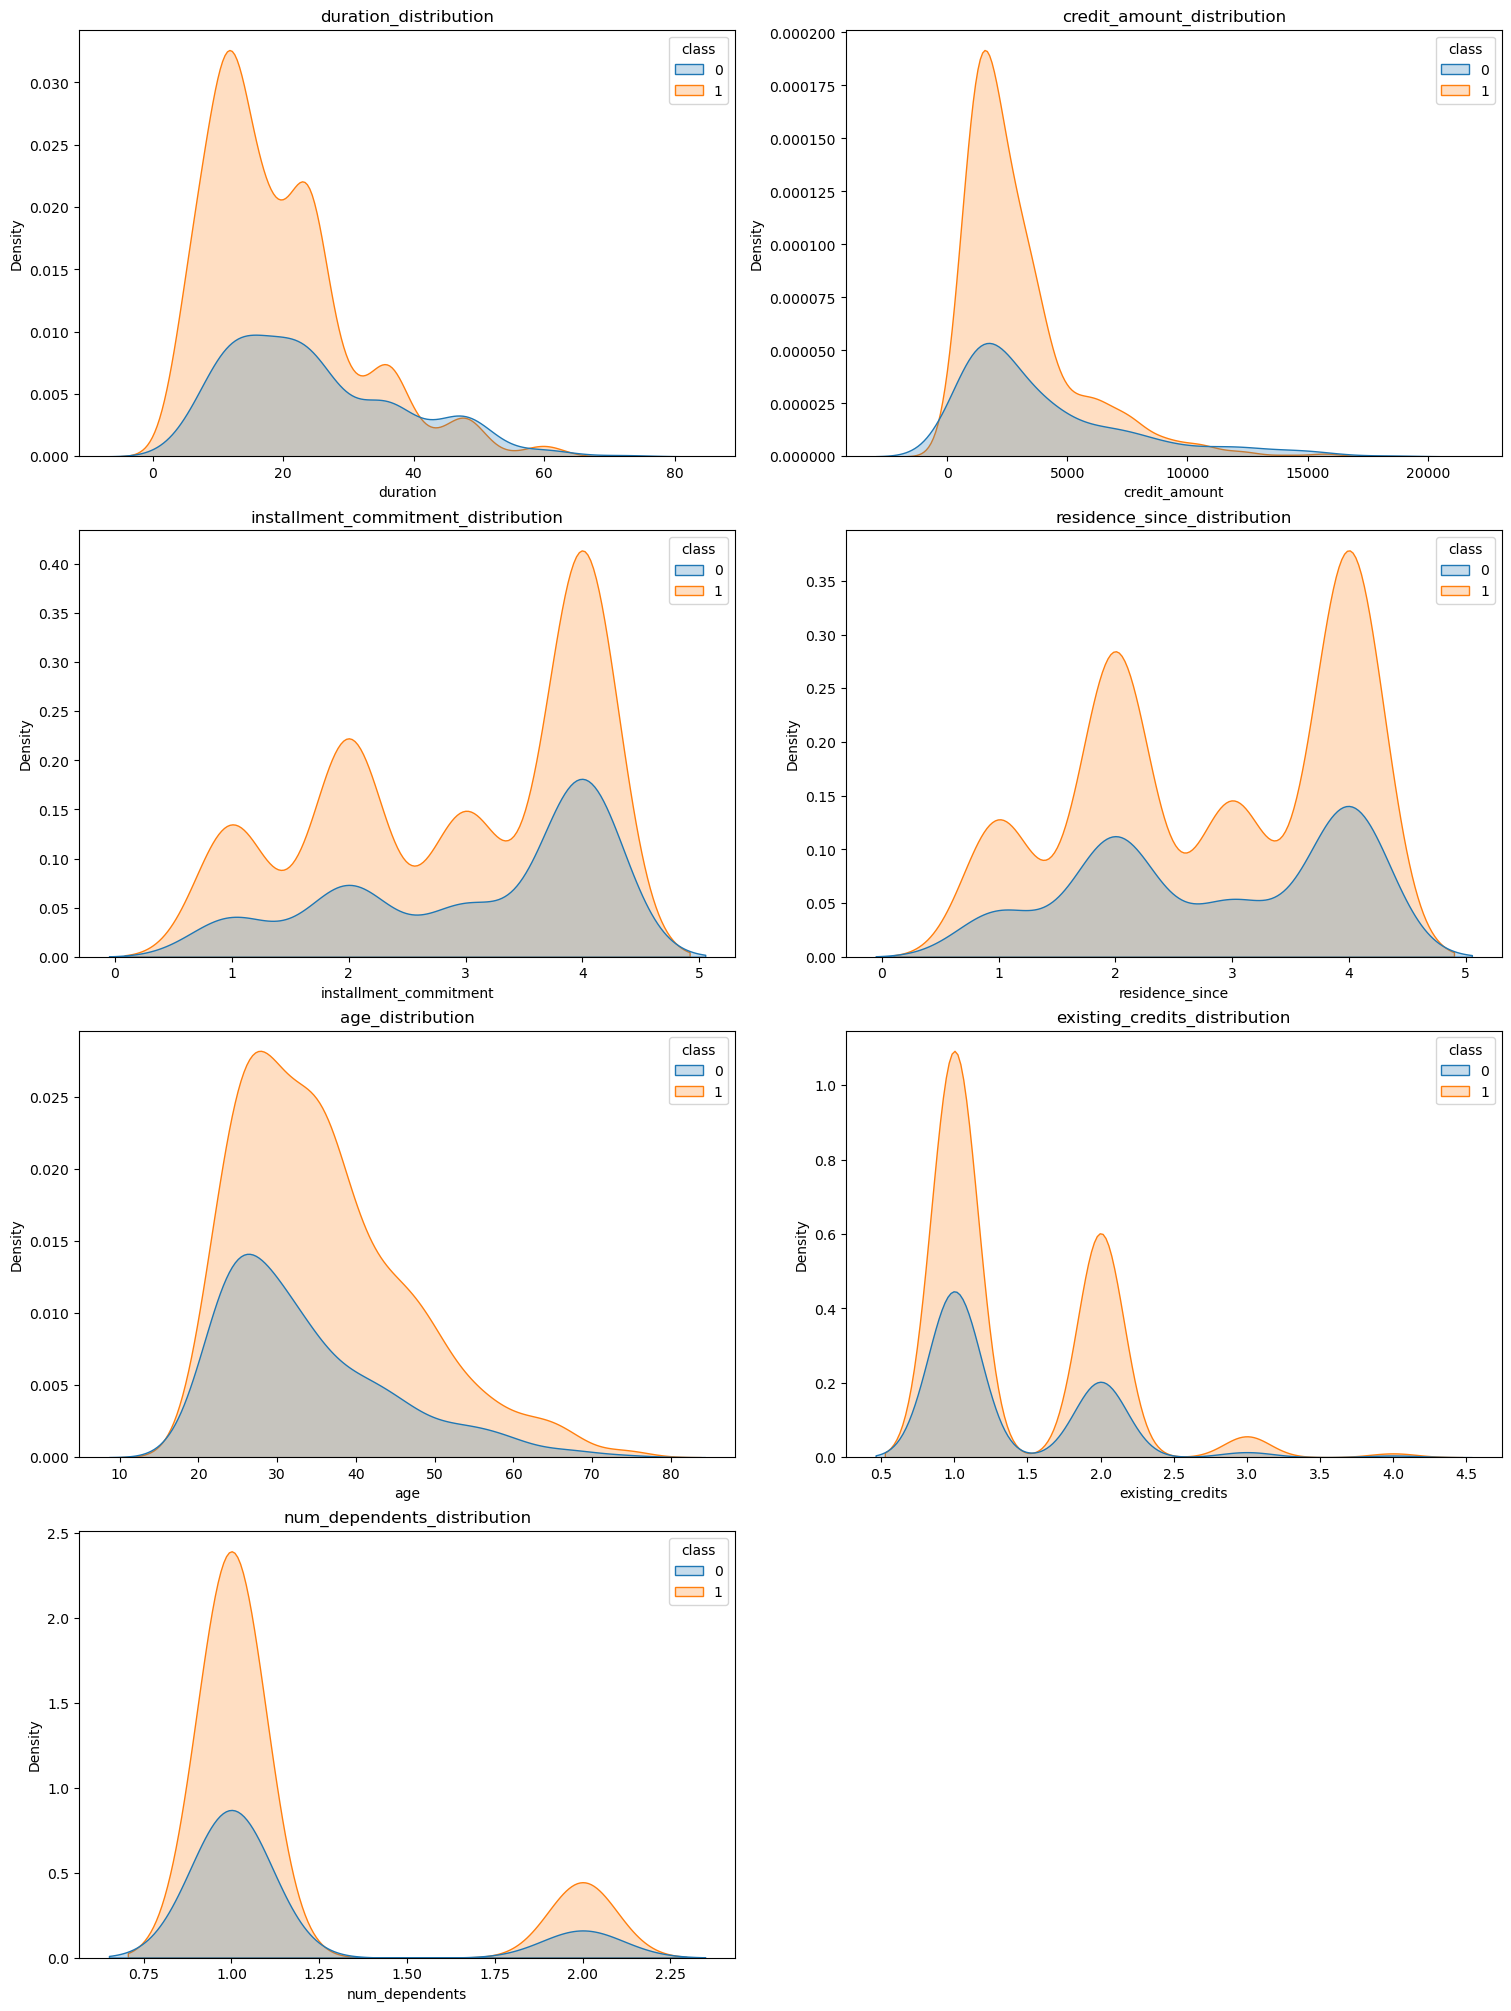

In [185]:
plt.figure(figsize=(15,20), layout='constrained')

for i in range(len(z)) :
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=cc,x=z[i],shade=True, hue=cc['class'])
    plt.title(z[i]+'_distribution')
plt.show()

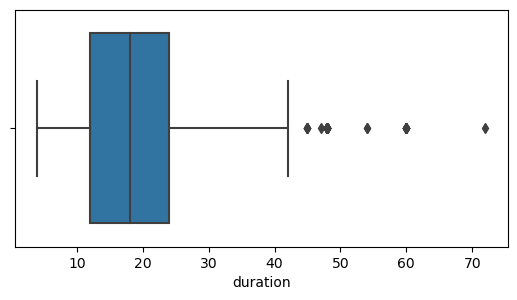

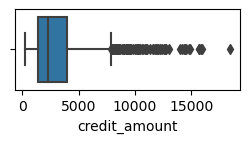

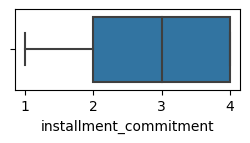

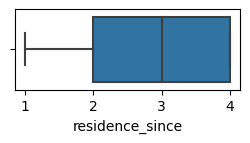

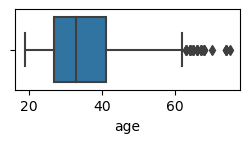

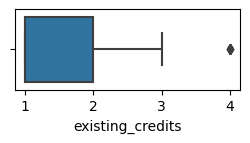

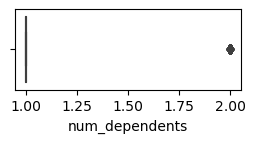

In [196]:
plt.figure(figsize=(10,10), layout = 'constrained')

for i in range(len(z)) :
    plt.subplot(4,2,i+1)
    sns.boxplot(cc[z[i]])
    plt.show()

In [20]:
cc.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [24]:
len(cc[(cc["age"]>=60) & (cc["class"]=="bad")])

# counting the number of people aged above 60 and are bad credit risks

13

In [55]:
# Checking outliers

col = ["existing_credits", "age", "credit_amount", "duration"]

for i in col :
    q1 = np.percentile(cc[i],25)
    q3 = np.percentile(cc[i],75)
    IQR = q3 - q1
    
    ll = q1 - 1.5*IQR
    ul = q3 + 1.5*IQR
    
    length = len(cc[(cc[i]<ll)]) + len(cc[cc[i]>ul])
                 
    outlier = {i : length}
    print(outlier)


{'existing_credits': 6}
{'age': 23}
{'credit_amount': 72}
{'duration': 70}


- CREDIT AMOUNT can be high or low based on type of object for which loan is required so will not discard it
- DURATION should not be too long as it may lead to defaulting or bad credit
- AGE Also should be appropriate based on duration of loan so that it can be paidoff

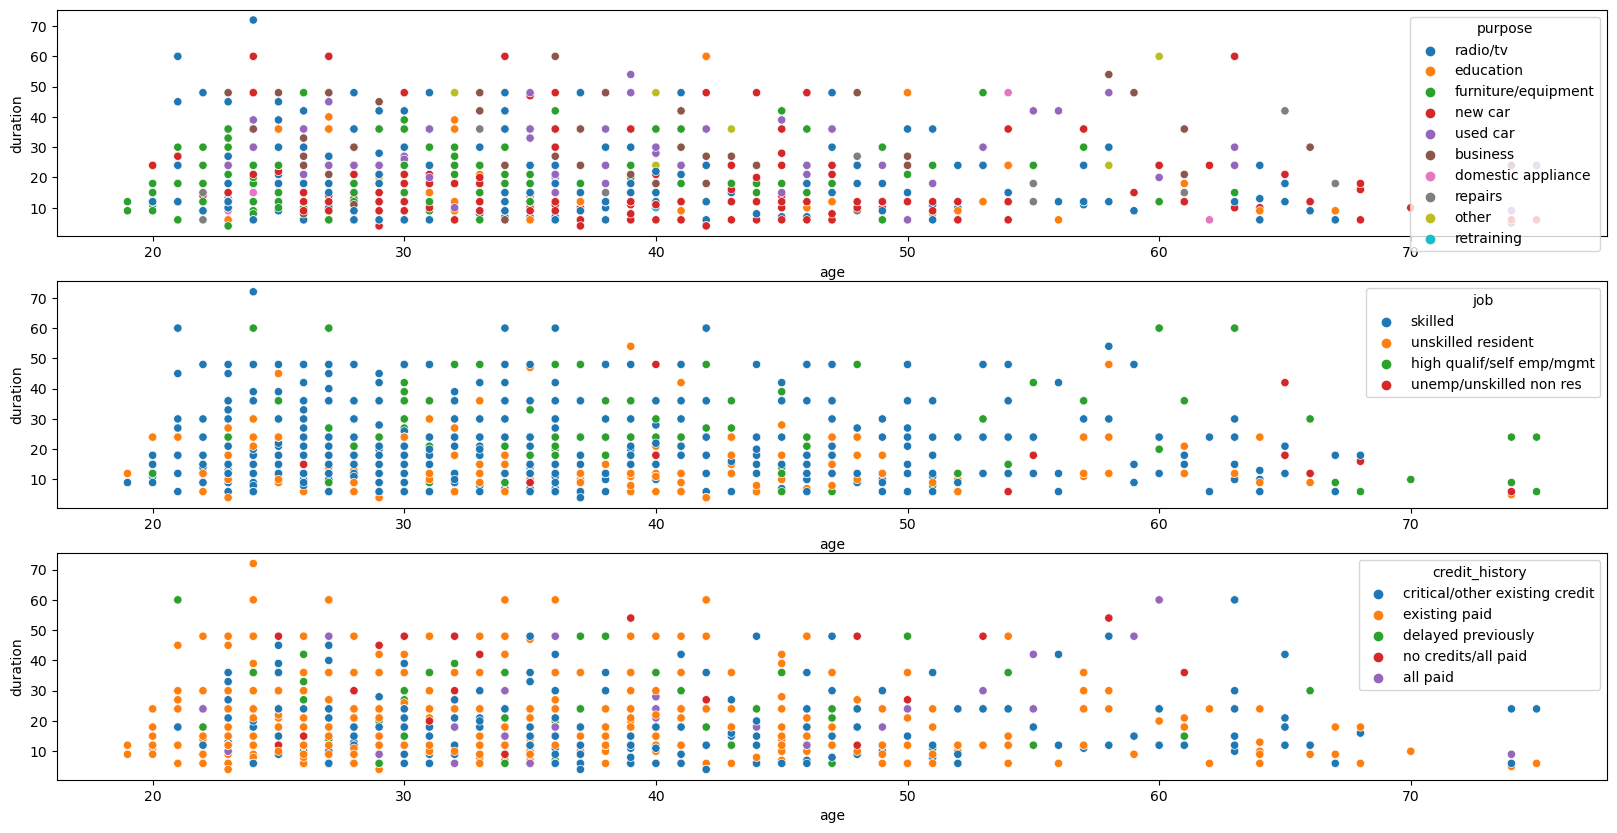

In [76]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
sns.scatterplot(x = cc.age , y = cc.duration, hue = cc.purpose )

plt.subplot(3,1,2)
sns.scatterplot(x = cc.age , y = cc.duration, hue = cc.job )

plt.subplot(3,1,3)
sns.scatterplot(x = cc.age , y = cc.duration, hue = cc.credit_history )

plt.show()

- We can see that for most of the people aged above 50 are skilled or employed
- Most of the credit has been paid off. 
- Delay in payment and unskilled are very low
- For people aged above 60 should not have loan duration more than 10 or 20 yeas and they seem to b outliers. Thus removing them

In [141]:
row = cc[(cc['age']>60) & (cc['duration']>20)].index
print(row)

Int64Index([29, 62, 179, 213, 237, 330, 373, 438, 465, 487, 606, 678, 715,
            838],
           dtype='int64')


In [142]:
for i in row :
    cc.drop(i, inplace = True)

In [143]:
cc.shape

(986, 21)

In [115]:
obj = cc.select_dtypes(include='object').columns
obj

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [114]:
for i in obj :
    n = cc[i].unique()
    print({i:n})

{'checking_status': array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)}
{'credit_history': array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)}
{'purpose': array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)}
{'savings_status': array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)}
{'employment': array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)}
{'personal_status': array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)}
{'other_parties': array(['none', 'guarantor', 'co applicant'], dtype=object)}
{'property_magnitude': array(['real estate', 'life insurance', 'no known property', 'car'],
      dtype=object)}
{'other_payment_plans': array(['none', 'bank', 'stores

In [144]:
cc.personal_status = cc.personal_status.map({"male single":0, 
                     "female div/dep/mar":1, 
                     "male div/sep":0, 
                     "male mar/wid":0  })

In [146]:
cc['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], [0,1,2,3], inplace = True)
cc['credit_history'].replace(['critical/other existing credit', 'delayed previously' , 'existing paid', 'no credits/all paid', 'all paid'], [0,1,2,2,2], inplace = True)
cc['purpose'].replace(['business', 'new car','used car', 'education', 'retraining', 'other','domestic appliance','radio/tv','furniture/equipment','repairs'], [5,5,4,4,3,3,3,2,2,1], inplace = True)
cc['savings_status'].replace(['no known savings', '<100','100<=X<500','500<=X<1000','>=1000'], [0,1,2,3,4], inplace = True)
cc['employment'].replace(['unemployed', '<1','1<=X<4','4<=X<7','>=7'], [0,1,2,3,4], inplace = True)
cc['other_parties'].replace(['none', 'co applicant', 'guarantor'], [0,1,2], inplace = True)
cc['property_magnitude'].replace(['no known property', 'life insurance', 'car', 'real estate'], [0,1,2,3], inplace = True)
cc['other_payment_plans'].replace(['none', 'stores', 'bank'], [0,1,1], inplace = True)
cc['housing'].replace(['for free', 'rent', 'own'], [0,1,2], inplace = True)
cc['job'].replace(['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt'], [0,1,2,3], inplace = True)

In [159]:
x.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents',
       'foreign_worker'],
      dtype='object')

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cc['class'] = le.fit_transform(cc['class'])
cc['foreign_worker'] = le.fit_transform(cc['foreign_worker'])
cc['own_telephone'] = le.fit_transform(cc['own_telephone'])
cc.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,0,2,1169,0,4,4,0,0,...,3,67,0,2,2,2,1,1,1,1
1,2,48,2,2,5951,1,2,2,1,0,...,3,22,0,2,1,2,1,0,1,0
2,0,12,0,4,2096,1,3,2,0,0,...,3,49,0,2,1,1,2,0,1,1
3,1,42,2,2,7882,1,3,2,0,2,...,1,45,0,0,1,2,2,0,1,1
4,1,24,1,5,4870,1,2,3,0,0,...,0,53,0,0,2,2,2,0,1,0


In [149]:
x = cc.drop(['class', 'own_telephone'], axis = 1)
y = cc['class']

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=5)

In [153]:
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)

In [154]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

In [155]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 33,  61],
       [ 28, 207]], dtype=int64)

In [157]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))

Accuracy:  0.729483282674772
Precision:  0.7723880597014925
Recall:  0.8808510638297873


In [161]:
x.shape[1]

19

In [162]:
# we are predicting for a 40 year old male with life insurance who wants a car loan of 5000 for 10 years. 
# Lives on rent, has no dependents

log_reg.predict([[0,10,1,2,5000,1,2,20,0,0,0,1,40,0,1,0,2,0,0]])

array([0], dtype=int64)

In [166]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', n_estimators=50)
rfc = rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57        74
           1       0.89      0.82      0.85       255

    accuracy                           0.78       329
   macro avg       0.70      0.73      0.71       329
weighted avg       0.80      0.78      0.79       329



In [170]:
rf = RandomForestClassifier(criterion='gini', n_estimators=200)
rfc = rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.46      0.60      0.52        72
           1       0.88      0.80      0.84       257

    accuracy                           0.76       329
   macro avg       0.67      0.70      0.68       329
weighted avg       0.78      0.76      0.77       329



### Random Forest & KNN are not a good fit for our model

In [199]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=20)
knn = KNN.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.46      0.60      0.52        72
           1       0.88      0.80      0.84       257

    accuracy                           0.76       329
   macro avg       0.67      0.70      0.68       329
weighted avg       0.78      0.76      0.77       329

